# Typst



In [18]:
import bpy
from IPython.display import Image, display
from mathutils import Vector
from pathlib import Path
from typst_importer.curve_utils import get_curve_collection_bounds
import tempfile

def fresh_scene(keep_cube=False):
    bpy.ops.object.select_all(action='DESELECT')
    # Keep only Plane, Camera and Sun
    for obj in bpy.context.scene.objects:
        if obj.name not in ['Plane', 'Camera', 'Sun']:
            obj.select_set(True)
    bpy.ops.object.delete()
    for collection in bpy.data.collections:
        if collection.name != "Collection":
            bpy.data.collections.remove(collection)

def render_result(width="300pt"):
    with tempfile.TemporaryDirectory() as tmpdir:
        output_path = str(Path(tmpdir) / 'img.png')
        bpy.ops.render.render()
        bpy.data.images['Render Result'].save_render(filepath=output_path)
        display(Image(filename=output_path, width=width, height="auto"))

path = Path.home() / "projects/bpy-gallery/docs/paper_background.blend" 
filepath= str(path)

with bpy.data.libraries.load(filepath, link=False) as (data_from, data_to):
    data_to.objects = data_from.objects

for obj in data_to.objects:
    if obj is not None:
        bpy.context.collection.objects.link(obj)

def adjust_camera_to_collection(c, padding_factor=-0.2):
    min_p, max_p = get_curve_collection_bounds(c)
    center = (min_p + max_p) / 2
    size = max_p - min_p
    padded_size = size * (1 + padding_factor)
    padded_max_dim = max(padded_size.x, padded_size.y, padded_size.z)

    if 'Camera' not in bpy.data.objects:
        bpy.ops.object.camera_add()
        camera = bpy.data.objects['Camera']
    else:
        camera = bpy.data.objects['Camera']
    
    bpy.context.scene.camera = camera
    camera.location = (center.x, center.y, center.z + padded_max_dim*2)
    camera.rotation_euler = (0, 0, 0)
    camera.data.type = 'ORTHO'
    camera.data.ortho_scale = padded_max_dim * 2
    aspect_ratio = padded_size.x / padded_size.y
    bpy.context.scene.render.resolution_x = 960
    bpy.context.scene.render.resolution_y = int(960 / aspect_ratio)


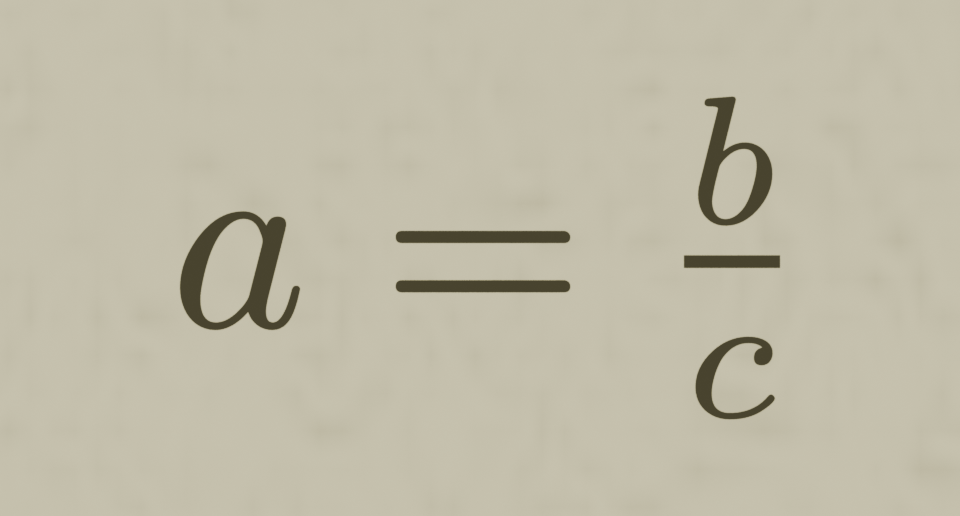

In [19]:
from typst_importer.typst_to_svg import typst_express
fresh_scene()

c = typst_express(
    "$ a = b/c$",
    scale_factor=200,
    origin_to_char=True,
    join_curves=True,
)
adjust_camera_to_collection(c)
render_result()

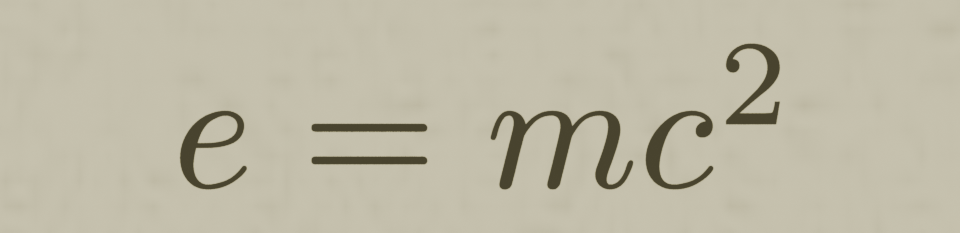

In [20]:
fresh_scene()
c = typst_express(
    "$ e = m c^2$",
    scale_factor=200,
    origin_to_char=True,
    join_curves=True,
)
adjust_camera_to_collection(c)
render_result()

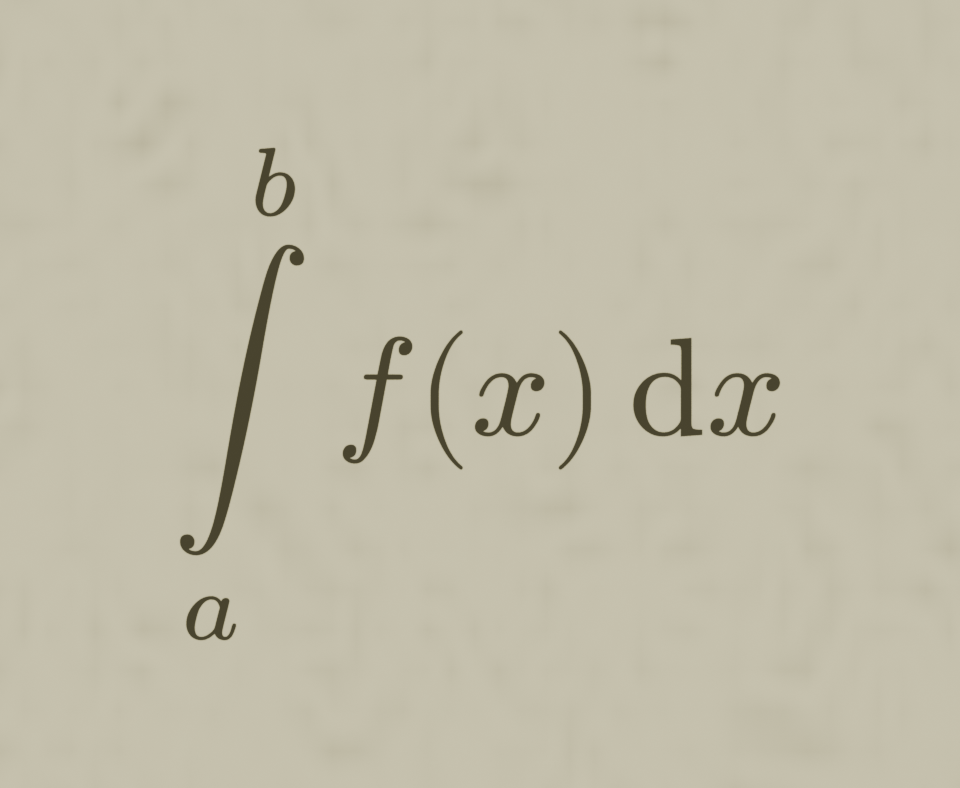

In [21]:
fresh_scene()
content = "$ limits(integral)_a^b f(x) dif x $" 
c = typst_express(content, name="Integral Example")
adjust_camera_to_collection(c)
render_result()

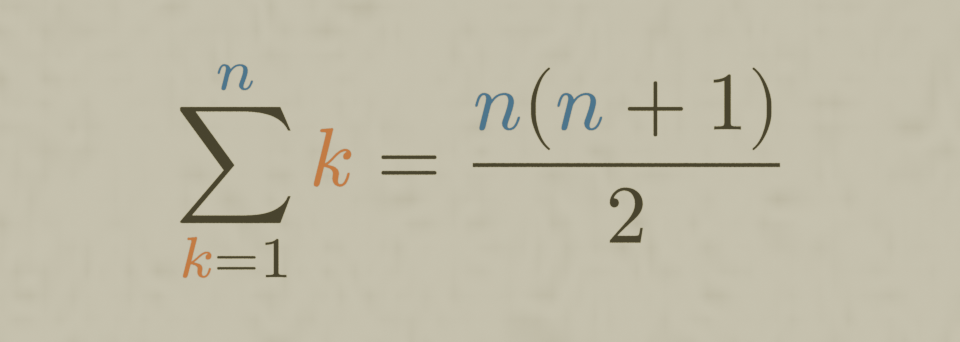

In [22]:
fresh_scene()
c = typst_express("""
#let korange() = text(fill: orange)[$k$]
#let nblue() = text(fill: blue)[$n$]
$ sum_(#korange() = 1)^#nblue() #korange() = (nblue()(nblue()+1)) / 2 $  
""")
adjust_camera_to_collection(c)
render_result(width="600pt")

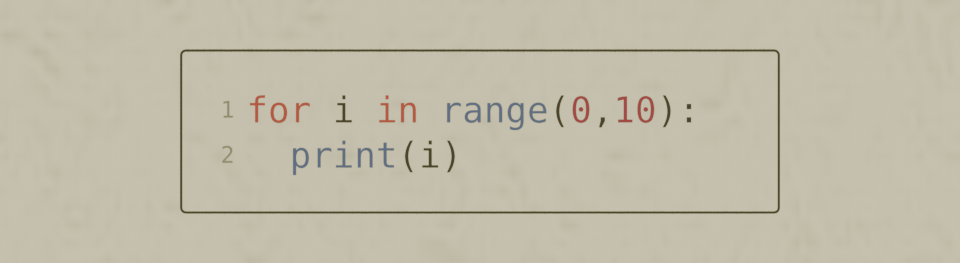

In [23]:
fresh_scene()
c = typst_express("""
#set page(width: 500pt, height: auto, margin: 0cm, fill: none)

#import "@preview/codelst:2.0.1": sourcecode
#import "@preview/tablex:0.0.8": tablex
#let sourcecode = sourcecode.with(frame: (code) => block(
  radius: 5pt,
  stroke: 2pt + luma(0),
  inset: 30pt,
  text(size: 30pt, code)
))

#sourcecode[```python
for i in range(0,10):
  print(i)
```]
""")
adjust_camera_to_collection(c)
render_result(width="900pt")

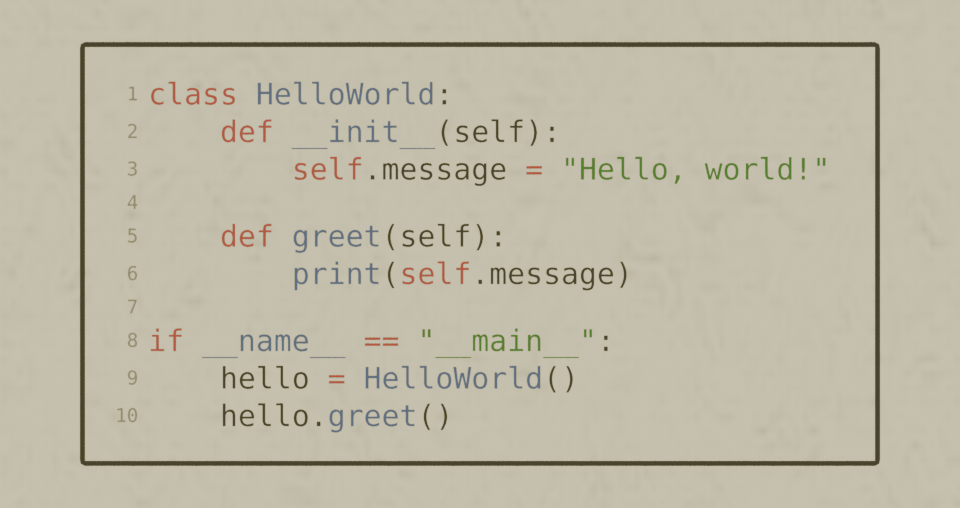

In [24]:
fresh_scene()
content = """
#set page(width: 800pt, height: auto, margin: 0cm, fill: none)

#import "@preview/codelst:2.0.1": sourcecode
#import "@preview/tablex:0.0.8": tablex

#let sourcecode = sourcecode.with(frame: (code) => block(
  radius: 5pt,
  stroke: 5pt + luma(0),
  inset: 30pt,
  text(size: 30pt, code)
))

#sourcecode[```python

class HelloWorld:
    def __init__(self):
        self.message = "Hello, world!"

    def greet(self):
        print(self.message)

if __name__ == "__main__":
    hello = HelloWorld()
    hello.greet()
```]
"""
c = typst_express(content)
adjust_camera_to_collection(c, padding_factor=-0.4)
render_result(width="900pt")

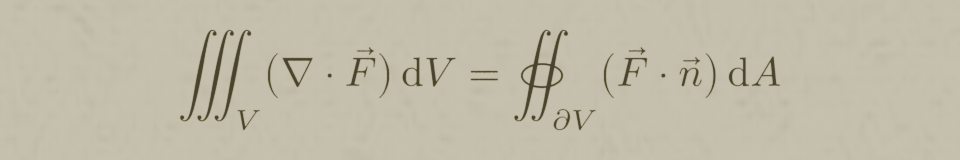

In [25]:
fresh_scene()
content = """
#set math.lr(size: 80%)
$ integral.triple _V (nabla dot accent(F, arrow)) dif V = integral.surf_(partial V)  (accent(F, arrow) dot accent(n, arrow)) dif A $
"""
c = typst_express(content)
adjust_camera_to_collection(c)
render_result(width="1200pt")